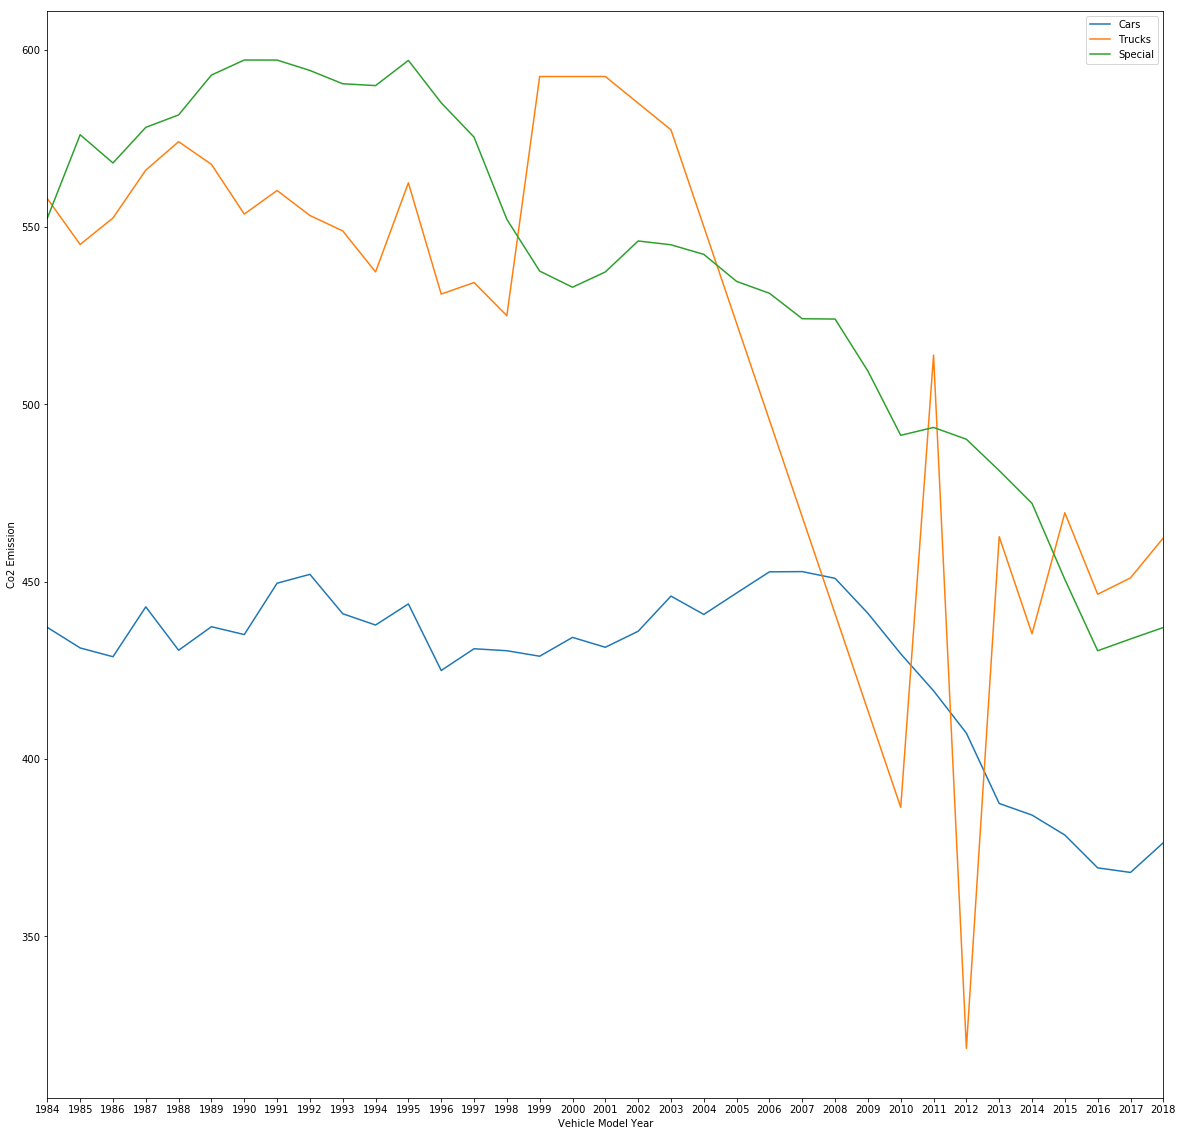

In [2]:
import pandas as pd
pd.options.display.max_rows = 150
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline
import timeit

#read csv file
df = pd.read_csv('vehicle-fuel-economy/vehicles.csv', low_memory=False)
#index 
df_sort = df.set_index("id")
#filter only selected data
df_co2 = df_sort[['co2TailpipeGpm','VClass','year']]
#print(df_co2.VClass.unique())
#create a new Column
df_co2['EPAClass'] = pd.Series((n for n in df_co2.VClass), index=df_co2.index)

#Assign these to Cars
df_co2.loc[df_co2.EPAClass == 'Two Seaters', 'EPAClass'] = 'Cars'
df_co2.loc[df_co2.EPAClass == 'Subcompact Cars', 'EPAClass'] = 'Cars'
df_co2.loc[df_co2.EPAClass == 'Compact Cars', 'EPAClass'] = 'Cars'
df_co2.loc[df_co2.EPAClass == 'Midsize Cars', 'EPAClass'] = 'Cars'
df_co2.loc[df_co2.EPAClass == 'Large Cars', 'EPAClass'] = 'Cars'
df_co2.loc[df_co2.EPAClass == 'Minicompact Cars', 'EPAClass'] = 'Cars'
df_co2.loc[df_co2.EPAClass == 'Small Station Wagons', 'EPAClass'] = 'Cars'
df_co2.loc[df_co2.EPAClass == 'Midsize-Large Station Wagons', 'EPAClass'] = 'Cars'
#Assign these df to Trucks
df_co2.loc[df_co2.EPAClass == 'Vans', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Vans, Cargo Type', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Small Pickup Trucks', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Standard Pickup Trucks', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Vans, Passenger Type', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Minivan - 2WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Sport Utility Vehicle - 4WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Minivan - 4WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Small Pickup Trucks 4WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Standard Pickup Trucks/2wd', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Vans Passenger', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Midsize Station Wagons', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Small Pickup Trucks 2WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Standard Pickup Trucks 2WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Standard Pickup Trucks 4WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Small Sport Utility Vehicle 4WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Standard Sport Utility Vehicle 2WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Standard Sport Utility Vehicle 4WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Small Sport Utility Vehicle 2WD', 'EPAClass'] = 'Trucks'
df_co2.loc[df_co2.EPAClass == 'Sport Utility Vehicle - 2WD', 'EPAClass'] = 'Trucks'
#Assign these df to Special
df_co2.loc[df_co2.EPAClass == 'Special Purpose df/2wd', 'EPAClass'] = 'Special'
df_co2.loc[df_co2.EPAClass == 'Special Purpose df/4wd', 'EPAClass'] = 'Special'
df_co2.loc[df_co2.EPAClass == 'Special Purpose Vehicle', 'EPAClass'] = 'Special'
df_co2.loc[df_co2.EPAClass == 'Special Purpose Vehicles/2wd', 'EPAClass'] = 'Special'
df_co2.loc[df_co2.EPAClass == 'Special Purpose Vehicle 2WD', 'EPAClass'] = 'Special'
df_co2.loc[df_co2.EPAClass == 'Special Purpose df', 'EPAClass'] = 'Special'
df_co2.loc[df_co2.EPAClass == 'Special Purpose Vehicle 4WD', 'EPAClass'] = 'Special'
df_co2.loc[df_co2.EPAClass == 'Special Purpose Vehicles/4wd', 'EPAClass'] = 'Special'
df_co2.loc[df_co2.EPAClass == 'Special Purpose Vehicles', 'EPAClass'] = 'Special'
#set multi index to group by
df_co2.set_index(['year','EPAClass'], inplace=True)
#find mean on year and EPAClass 
grouped = df_co2.groupby(level=['year', 'EPAClass']).mean().dropna()
#drop the index
grouped.reset_index(inplace=True)

ax = plt.subplot(111)
grouped[grouped.EPAClass.isin(['Cars','Trucks', 'Special'])].groupby('EPAClass').plot(y='co2TailpipeGpm', x='year', kind='line',figsize=(20,20), ax=ax)
L = plt.legend()
_ = [plt.setp(item, 'text', T) for item, T in zip(L.texts, ['Cars','Trucks','Special'])]
_ = ax.set_xticks(grouped.year.unique())
_ = ax.set_ylabel("Co2 Emission")
_ = ax.set_xlabel("Vehicle Model Year")


In [ ]:
grouped.head()

In [ ]:
vehicles_co2['VClass'].unique()

The above plot has used Pandas Plot function to show Co2 Emission Data based on Each model year. The CO2 Emission is known for a big concern in climate change. The above plot shows that CO2 Emission has decreased signifincatly over the years for each type of vehicle. 

The original csv file was read and only required fields were selected. Then different type of VClass were grouped into three different vehicle categories. Finally Co2 emission mean value is calculated on each year and vehicle class and plotted.

In [3]:
df

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
5,14.982273,0.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
6,13.184400,0.0,0.0,0.0,22,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
7,13.733750,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
8,12.677308,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
9,13.184400,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [13]:
dfq = df[(df['make'] == 'Ford') & (df['model'] == 'Mustang')]

In [16]:
dfq['VClass'].unique()

array(['Subcompact Cars'], dtype=object)